In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/advertising.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.shape

(200, 4)

In [7]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**DATA VISUALIZATION**

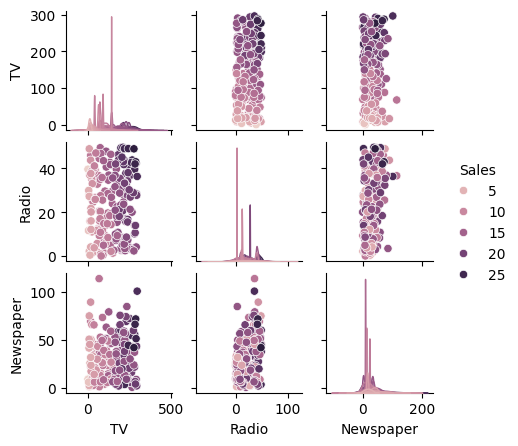

In [9]:
sns.pairplot(df,hue = 'Sales', height = 1.5)

**Inference**

The pairplot suggests that TV advertising has the strongest positive correlation with Sales, followed by Radio, while Newspaper advertising has a weaker correlation. The combination of different advertising mediums can also impact Sales, but the effect varies.

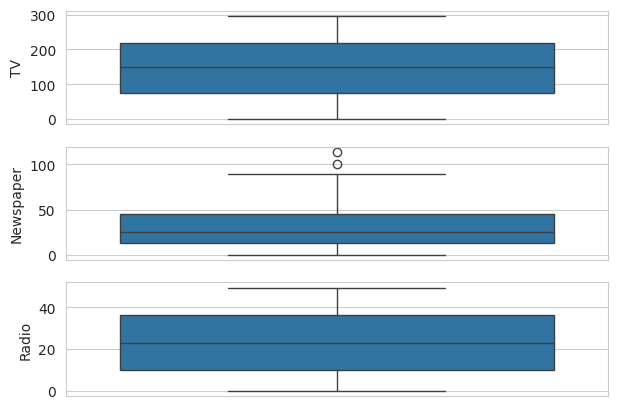

In [23]:
fig, axs = plt.subplots(3, figsize = (7,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.show()

**Inference from the Boxplot Graphs:**

# 1. TV Advertising:
- The boxplot shows a wide spread, indicating high variability in TV advertising spending.
- There are a few outliers with very high TV advertising spending.
- The median (line inside the box) suggests that most companies spend moderately on TV advertising.

# 2. Newspaper Advertising:
- The boxplot is narrower compared to TV advertising, suggesting less variability in newspaper advertising spending.
- There are no outliers observed.
- The median indicates that most companies spend a relatively small amount on newspaper advertising.

# 3. Radio Advertising:
- The boxplot shows a moderate spread, with less variability compared to TV advertising but more than newspaper advertising.
- There are a few outliers with high radio advertising spending.
- The median suggests that most companies spend moderately on radio advertising.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
X = df[['TV']]
y = df['Sales']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.head()

,TV
79,116.0
197,177.0
38,43.1
24,62.3
122,224.0


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared score:", r2)


Mean squared error: 6.101072906773963
R-squared score: 0.802561303423698


In [31]:
# Getting user input for TV advertising spending
tv_spend = float(input("Enter the amount spent on TV advertising: "))

# Create a data frame with the input value
new_data = pd.DataFrame({'TV': [tv_spend]})

# Use the trained model to predict sales
predicted_sales = model.predict(new_data)[0]

# Print the predicted sales value
print("Predicted sales:", predicted_sales)
print("R-squared score:", model.score(X, y))

Enter the amount spent on TV advertising: 67
Predicted sales: 10.724465671649883
R-squared score: 0.8121316219239643
